In [1]:
import pandas as pd
import numpy as np

# Read n rows from the embedded data
df = pd.read_csv('../data/vec_avg_token_data.csv')
label_vectors = pd.read_csv('../data/label_token_embeddings.csv')
synonym_label_vectors = pd.read_csv('../data/synonym_label_token_embeddings.csv')

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [2]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics import accuracy_score as acc_score

pred = np.argmax(cs(X, label_vectors), axis = 1)
print("Accuracy with original labels:",acc_score(y,pred))

synonym_pred = np.argmax(cs(X, synonym_label_vectors), axis = 1)
print("Accuracy with labels including synonyms:",acc_score(y, synonym_pred))

Accuracy with original labels: 0.511
Accuracy with labels including synonyms: 0.59


In [3]:
import numpy as np
from sklearn.manifold import TSNE

# Use T-sne to get the data from 128 to 2 dimensions
data = np.append(X, label_vectors, axis=0)
data_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data)
X_embedded = data_embedded[:-4,:]
labels_embedded = data_embedded[-4:,:]

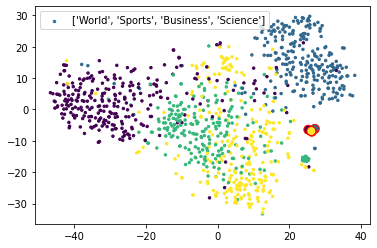

In [4]:
import matplotlib.pyplot as plt
labels = ["World","Sports","Business","Science"]

# Plot 2 dimensional data
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = y, s = 6, label = labels)
plt.scatter(labels_embedded[:,0], labels_embedded[:,1], c= list(range(len(labels))), s = 80, edgecolors='r')
plt.legend();

In [5]:
import numpy as np
from sklearn.manifold import TSNE

# Use T-sne to get the data from 128 to 2 dimensions
data = np.append(X, synonym_label_vectors, axis=0)
data_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data)
syn_X_embedded = data_embedded[:-4,:]
syn_labels_embedded = data_embedded[-4:,:]

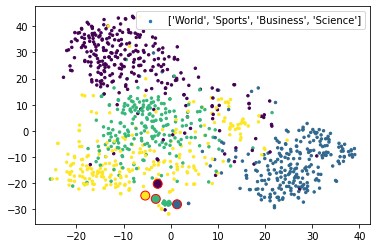

In [6]:
import matplotlib.pyplot as plt

# Plot 2 dimensional data
plt.scatter(syn_X_embedded[:,0], syn_X_embedded[:,1], c = y, s = 6, label = labels)
plt.scatter(syn_labels_embedded[:,0], syn_labels_embedded[:,1], c= list(range(len(labels))), s = 80, edgecolors='r')
plt.legend();